In [ ]:
# Apple Music Data Project

This project focuses on a dataset which was requested from apple data privacy and includes various information in relation to my music listening. The aim of the project is to find interesting insights into my music listening habits.

This type of data can be requested from apple provided a valid apple ID is used. The data can then be requested from their 'Data and Privacy' page. 

The project works with two different types of dataset: My library data (data about the songs in my library) and my listening data (data about how I listen to my library since I started using the streaming service)

Readying the workspace with 'imports' and such

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy()

In [ ]:
Importing the listening and library dataset into the workspace. 

In [5]:
csv_filepath = 'Apple Music Play Activity.csv'
listening_data = pd.read_csv(csv_filepath)
listening_data

json_tracks_filepath = 'Apple Music Library Tracks.json'
library_data = pd.read_json(json_tracks_filepath)
pd.set_option('display.max_columns', None)
library_data


,Transaction Type,Transaction Identifier,Transaction Date,UserAgent,Subscription Start Date,Subscription Type,User,Country,Language,Tracks,Track Identifiers,Playlists,Playlist Identifier,Playlist,Playlist Item Identifiers Appended,Modified Container Identifiers
0,optInUser,10000000,2016-07-05T20:52:47Z,Internal Software,2016-07-05T20:52:47Z,Apple Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,updateUser,10000001,2016-07-05T20:52:54Z,"itunescloudd/1.0 iOS/9.3.2 model/iPhone6,2 hwp...",NaN,NaN,{'Subscription Start Date': '2016-07-05T20:52:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addItems,10000002,2016-07-05T21:00:57Z,"itunescloudd/1.0 iOS/9.3.2 model/iPhone6,2 hwp...",NaN,NaN,NaN,AUS,en-au,"[{'Content Type': 'Song', 'Track Identifier': ...",NaN,NaN,NaN,NaN,NaN,NaN
3,addItems,10000003,2016-07-05T21:01:09Z,"itunescloudd/1.0 iOS/9.3.2 model/iPhone6,2 hwp...",NaN,NaN,NaN,AUS,en-au,"[{'Content Type': 'Song', 'Track Identifier': ...",NaN,NaN,NaN,NaN,NaN,NaN
4,addItems,10000004,2016-07-05T21:01:30Z,"itunescloudd/1.0 iOS/9.3.2 model/iPhone6,2 hwp...",NaN,NaN,NaN,AUS,en-au,"[{'Content Type': 'Song', 'Track Identifier': ...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,addItems,10002426,2020-06-21T02:20:42Z,"itunescloudd/1.0 iOS/13.5.1 model/iPhone8,1 hw...",NaN,NaN,NaN,AUS,en-au,"[{'Content Type': 'Song', 'Track Identifier': ...",NaN,NaN,NaN,NaN,NaN,NaN
2389,updateItems,10002427,2020-06-21T02:20:43Z,"itunescloudd/1.0 iOS/13.5.1 model/iPhone8,1 hw...",NaN,NaN,NaN,AUS,en-au,"[{'Track Identifier': 182891782, 'Apple Music ...",NaN,NaN,NaN,NaN,NaN,NaN
2390,addItems,10002428,2020-06-21T02:26:25Z,"itunescloudd/1.0 iOS/13.5.1 model/iPhone8,1 hw...",NaN,NaN,NaN,AUS,en-au,"[{'Content Type': 'Song', 'Track Identifier': ...",NaN,NaN,NaN,NaN,NaN,NaN
2391,deleteItems,10002429,2020-06-22T21:50:15Z,"itunescloudd/1.0 iOS/13.5.1 model/iPhone8,1 hw...",NaN,NaN,NaN,AUS,en-au,NaN,[182874126],NaN,NaN,NaN,NaN,NaN


Let's explore the possibilities of the dataset by looking at the columns 

In [3]:
library_data.columns

Index(['Content Type', 'Track Identifier', 'Title', 'Sort Name', 'Artist',
       'Sort Artist', 'Is Part of Compilation', 'Album', 'Sort Album',
       'Album Artist', 'Genre', 'Track Year', 'Track Number On Album',
       'Track Count On Album', 'Disc Number Of Album', 'Disc Count Of Album',
       'Track Duration', 'Track Play Count', 'Date Added To Library',
       'Date Added To iCloud Music Library', 'Last Modified Date',
       'Last Played Date', 'Skip Count', 'Date of Last Skip', 'Is Purchased',
       'Audio File Extension', 'Is Checked', 'Copyright', 'Release Date',
       'Purchased Track Identifier', 'Apple Music Track Identifier',
       'Composer', 'Tag Matched Track Identifier', 'Track Like Rating',
       'Album Like Rating', 'Comments', 'Purchase Date', 'Rating',
       'Album Rating', 'Remember Playback Position', 'Album Rating Method',
       'Playlist Only Track', 'Display Work Name', 'Grouping'],
      dtype='object')

In [16]:
#Cleaning up the data set
#for i in range(1, len(library_data.columns)): #length of library data columns is around 45
#    if 33 < i < (len(library_data.columns) - 1):
#        library_data.drop(library_data.columns[[i]])
#    else:
#        pass       
#library_data.columns
    

KeyError: "['Album Like Rating'] not found in axis"

Let's get to know the type of music I listen to and some aspects of my library

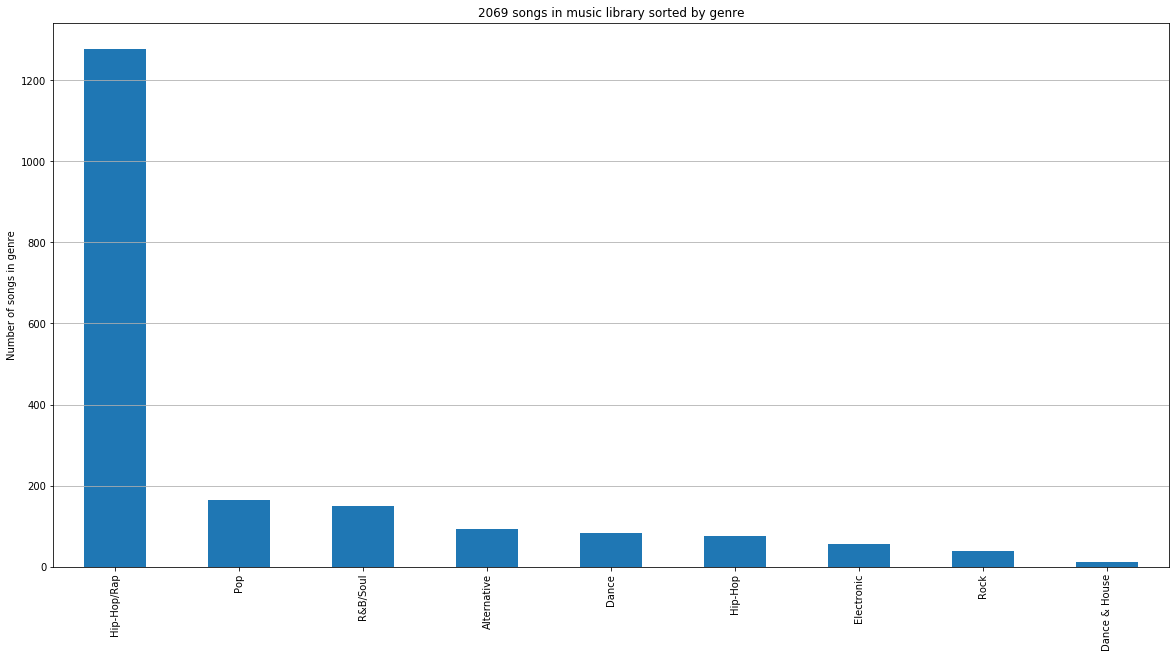

In [45]:
genre_bar = library_data["Genre"].value_counts()
genre_bar[genre_bar > 10].plot(kind='bar')
plt.ylabel('Number of songs in genre')
plt.title('{} songs in music library sorted by genre'.format(str(len(library_data['Title']))))
plt.axes().yaxis.grid()
plt.show()

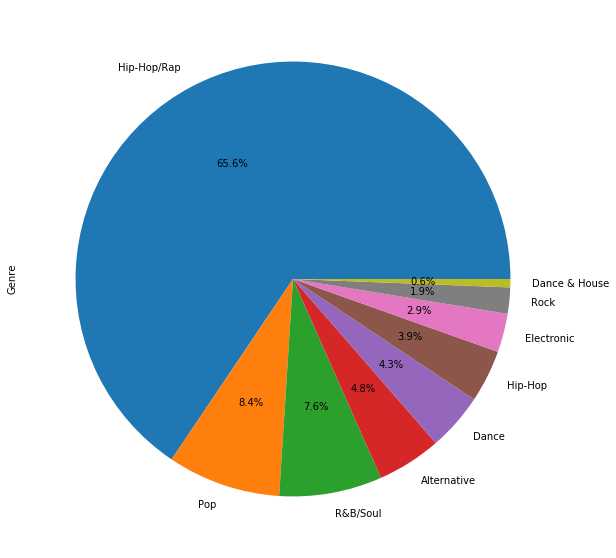

In [8]:
genre_pie = library_data["Genre"].value_counts()
genre_pie[genre_pie > 10].plot(kind='pie', autopct='%1.1f%%')


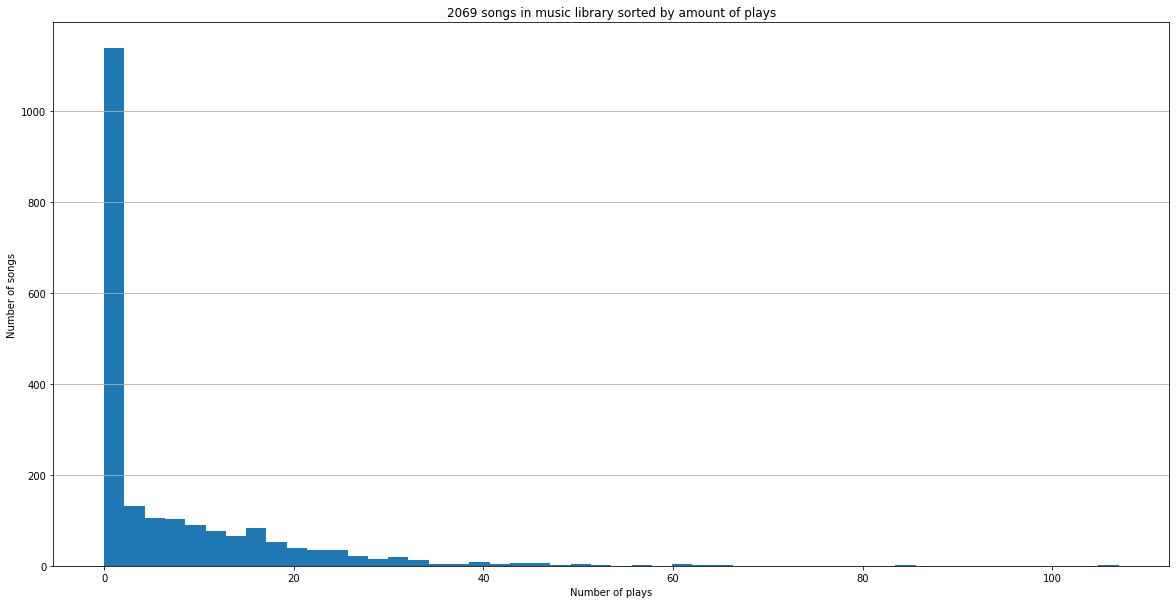

In [47]:
library_data['Track Play Count'].plot(kind='hist', bins=20)
plt.ylabel('Number of songs')
plt.xlabel('Number of plays')
plt.title('{} songs in music library sorted by amount of plays'.format(str(len(library_data['Title']))))
plt.axes().yaxis.grid()
plt.show()

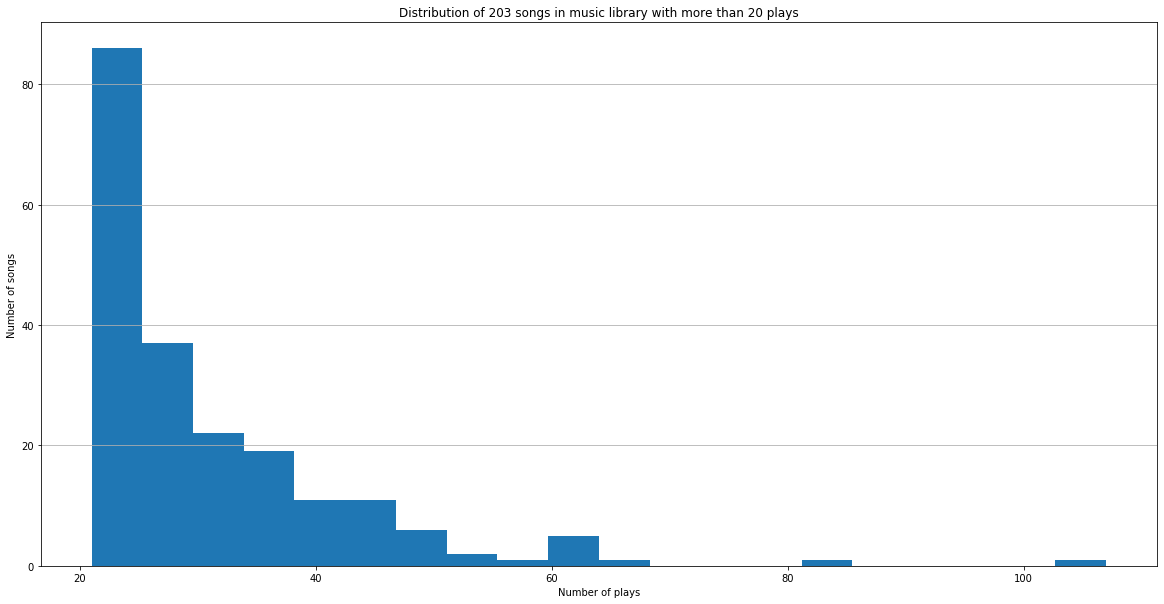

In [61]:
library_data['Track Play Count'][library_data['Track Play Count'] > 20].plot(kind='hist', bins=20)
plt.ylabel('Number of songs')
plt.xlabel('Number of plays')
plt.title('Distribution of {} songs in music library with more than 20 plays'.format(str(len(library_data['Track Play Count'][library_data['Track Play Count'] > 20]))))
plt.axes().yaxis.grid()
plt.show()

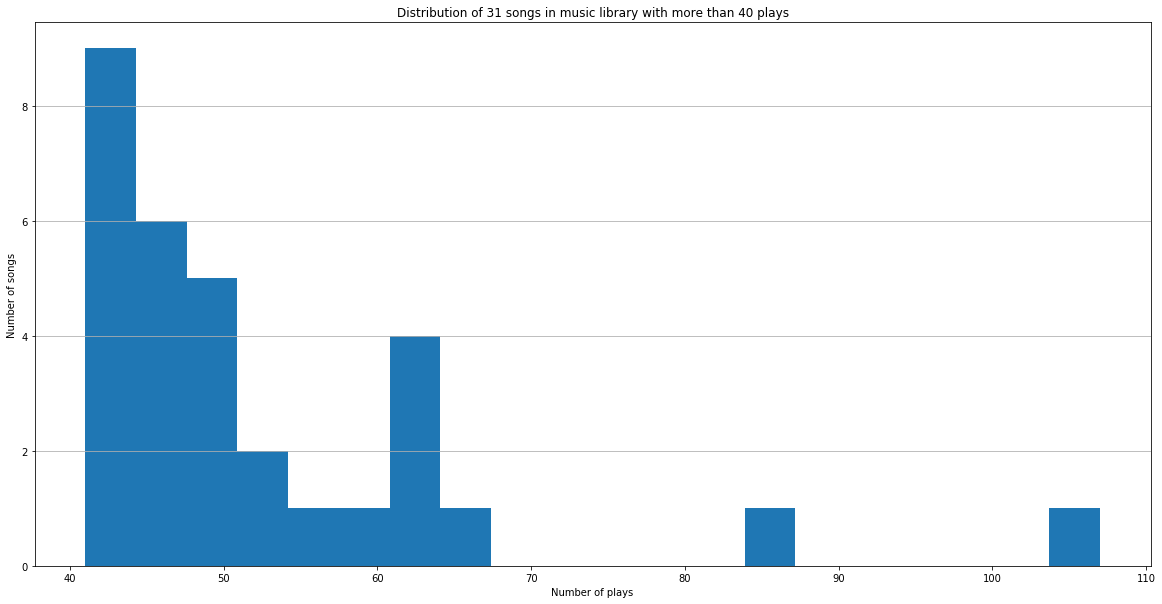

In [62]:
library_data['Track Play Count'][library_data['Track Play Count'] > 40].plot(kind='hist', bins=20)
plt.ylabel('Number of songs')
plt.xlabel('Number of plays')
plt.title('Distribution of {} songs in music library with more than 40 plays'.format(str(len(library_data['Track Play Count'][library_data['Track Play Count'] > 40]))))
plt.axes().yaxis.grid()
plt.show()

Let's find the songs that I definitely like far too much

In [63]:
plays = library_data[['Title', 'Artist', 'Track Play Count']]
plays[plays['Track Play Count'] > 55]
#107 plays * 173 seconds (play time) = 18511 seconds = 308.5 minutes = 5.14 hours of my life listening to one song!

,Title,Artist,Track Play Count
8,V. 3005,Childish Gambino,61
645,Let You Go,A$AP Ferg,66
1099,Jealousy,Roy Woods,84
1101,Instinct (feat. MadeinTYO),Roy Woods,107
1138,Questions,Chris Brown,61
1171,Lush Life,Zara Larsson,63
1215,How I Feel,Roy Woods,56
1216,Got Me,Roy Woods,60
1218,Sonic Boom,Roy Woods,62


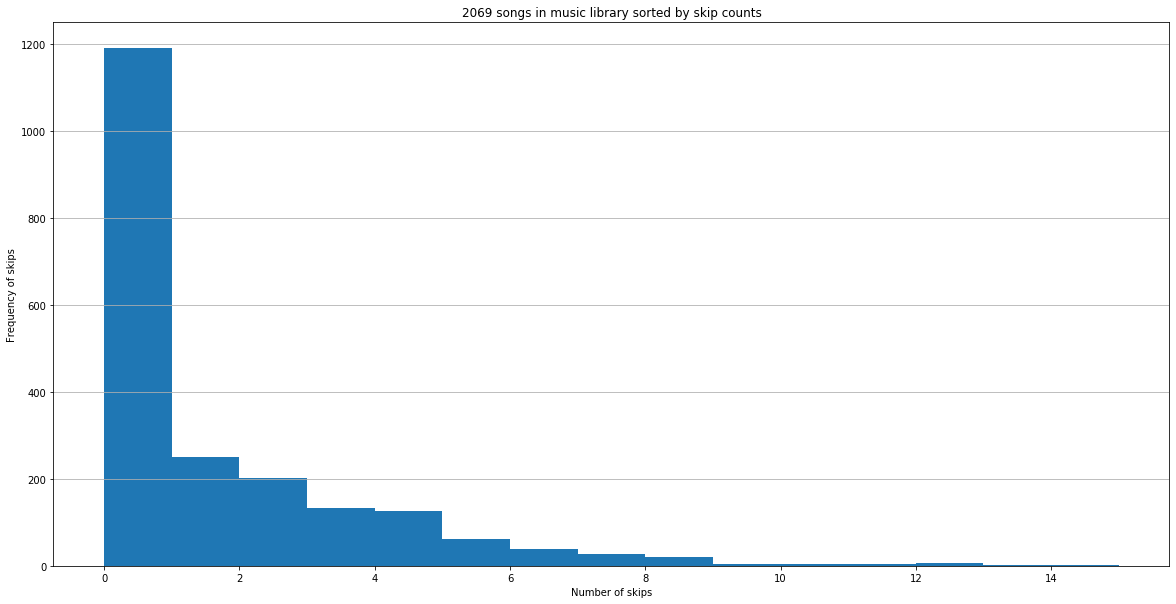

,Title,Artist,Skip Count
9,Playing Around Before the Party Starts,Childish Gambino,12
567,Be Yourself,Frank Ocean,13
622,Skin,Mac Miller,12
640,lose,Travis Scott,12
643,Let It Bang (feat. ScHoolboy Q),A$AP Ferg,12
1127,Romeo & Juliet,Trippie Redd,12
1129,Mega Man,Tay-K,15
1145,Neon Guts (feat. Pharrell Williams),Lil Uzi Vert,12


In [68]:
#library_data['Skip Count'].plot()
library_data['Skip Count'].plot(kind='hist', bins=10)
plt.xlabel('Number of skips')
plt.ylabel('Frequency of skips')
plt.axes().yaxis.grid()
plt.title('{} songs in music library sorted by skip counts'.format(str(len(library_data['Title']))))
plt.show()

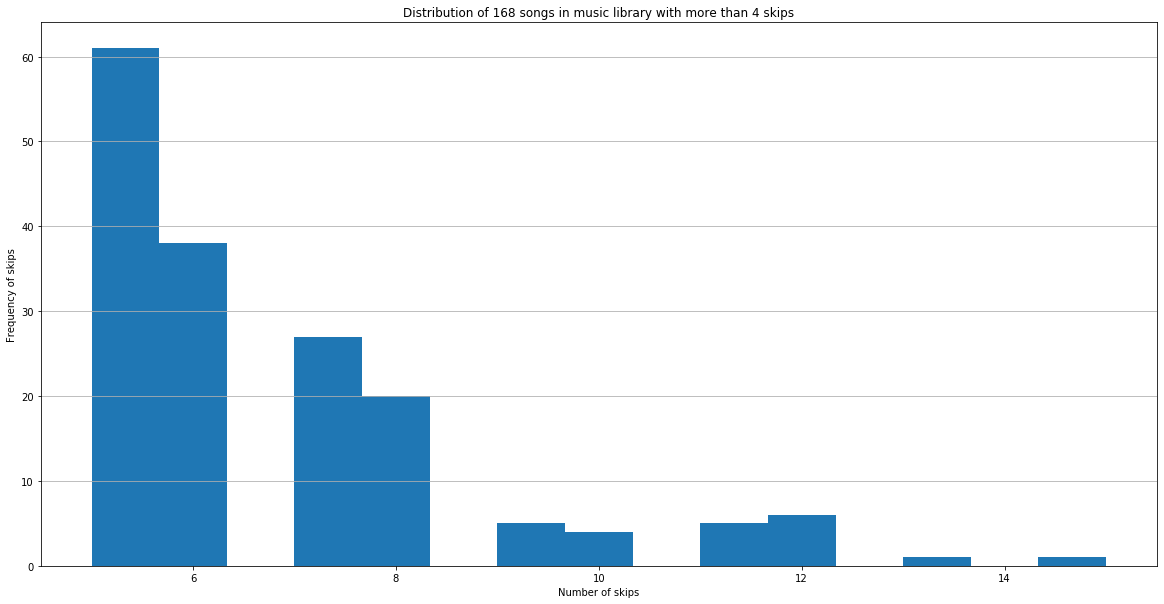

In [72]:
library_data['Skip Count'][library_data['Skip Count'] > 4].plot(kind='hist', bins=10)
plt.xlabel('Number of skips')
plt.ylabel('Frequency of skips')
plt.axes().yaxis.grid()
plt.title('Distribution of {} songs in music library with more than 4 skips'.format(str(len(library_data['Skip Count'][library_data['Skip Count'] > 4]))))
plt.show()

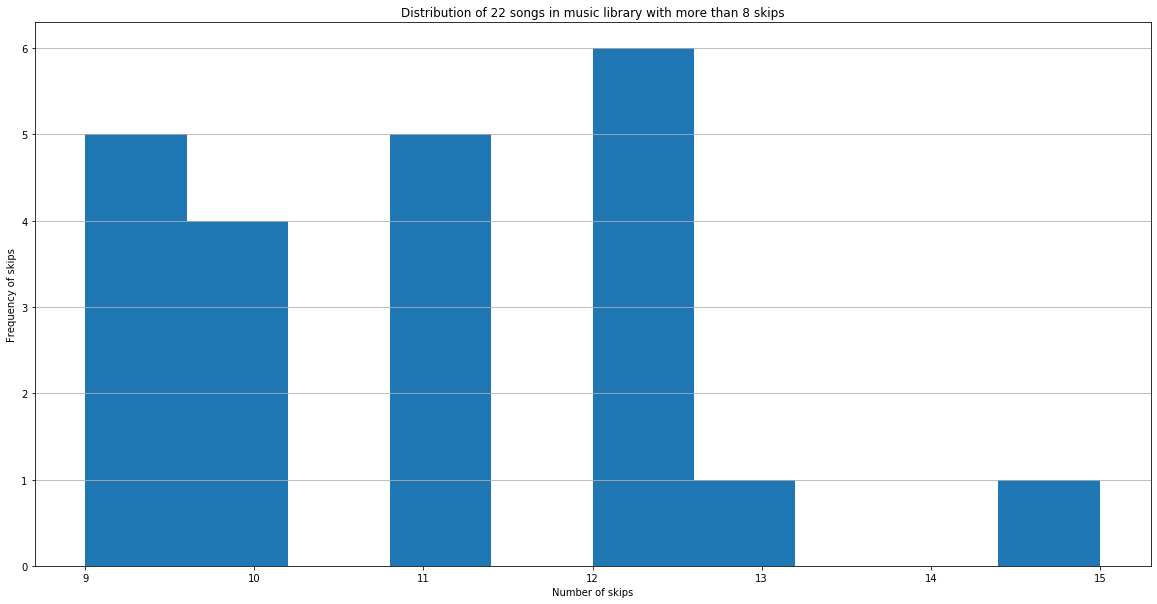

In [74]:
library_data['Skip Count'][library_data['Skip Count'] > 8].plot(kind='hist', bins=10)
plt.xlabel('Number of skips')
plt.ylabel('Frequency of skips')
plt.axes().yaxis.grid()
plt.title('Distribution of {} songs in music library with more than 8 skips'.format(str(len(library_data['Skip Count'][library_data['Skip Count'] > 8]))))
plt.show()

Let's find the songs that I should probably delete from my library

In [75]:
skips = library_data[['Title', 'Artist', 'Skip Count']]
skips[library_data['Skip Count'] > 11]

,Title,Artist,Skip Count
9,Playing Around Before the Party Starts,Childish Gambino,12
567,Be Yourself,Frank Ocean,13
622,Skin,Mac Miller,12
640,lose,Travis Scott,12
643,Let It Bang (feat. ScHoolboy Q),A$AP Ferg,12
1127,Romeo & Juliet,Trippie Redd,12
1129,Mega Man,Tay-K,15
1145,Neon Guts (feat. Pharrell Williams),Lil Uzi Vert,12


It is definitely no surprise that I don't actually like any of these songs at all. You might also notice that the first song in the list is also the shortest song in my library at a whopping 4.8 seconds.

,Title,Artist,track_duration_minutes
0,The Library (Intro),Childish Gambino,0.080200
3,Dial Up,Childish Gambino,0.742267
9,Playing Around Before the Party Starts,Childish Gambino,0.907567
12,Death By Numbers,Childish Gambino,0.732800
47,The Cube (Scene),Logic,0.453917
55,Lucidity (Scene),Logic,0.930117
86,Kerney Sermon (Skit),J. Cole,0.767783
94,Where's Jermaine? (Skit),J. Cole,0.611117
161,I Love Kanye,Kanye West,0.747117
166,Frank's Track,Kanye West,0.638883


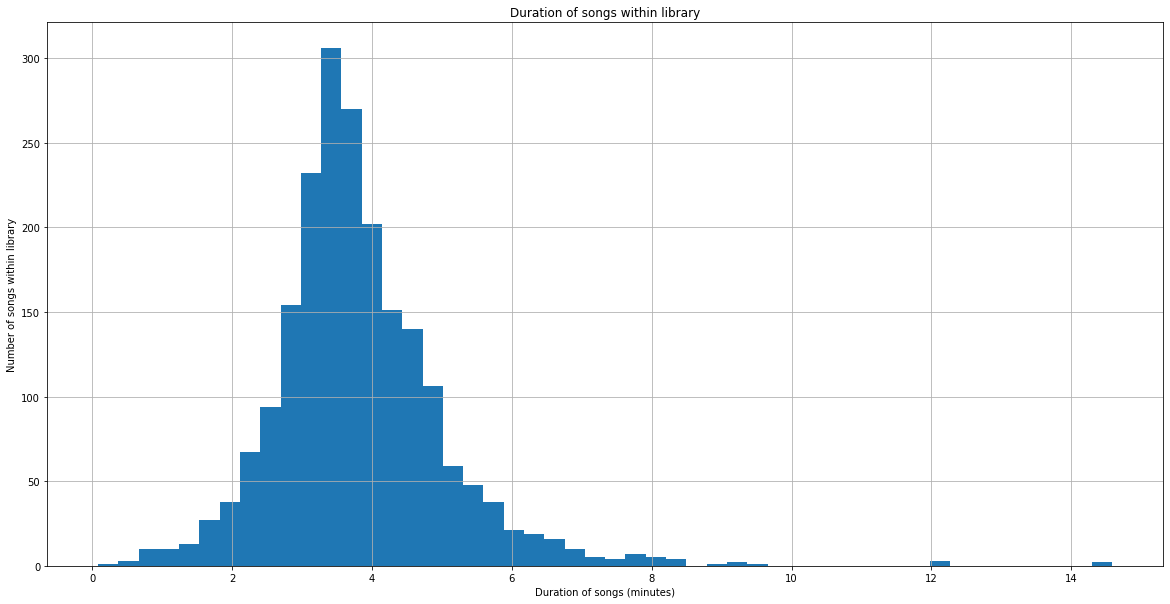

In [77]:
library_data["track_duration_minutes"] = library_data["Track Duration"] / 60000
library_data["track_duration_minutes"].hist(bins=50)
plt.xlabel('Duration of songs (minutes)')
plt.ylabel('Number of songs within library')
plt.title('Duration of songs within library')
plt.grid(True)
plt.show

In [84]:
titles_minutes = library_data[['Title', 'Artist', 'track_duration_minutes']]
titles_minutes[titles_minutes.track_duration_minutes > 10] #The longest songs in my library


,Title,Artist,track_duration_minutes
84,Note to Self,J. Cole,14.588083
217,Mortal Man,Kendrick Lamar,12.118367
227,"Sing About Me, I'm Dying of Thirst",Kendrick Lamar,12.059667
1015,AfricAryaN (feat. Neil deGrasse Tyson),Logic,12.140050
1064,Note to Self,J. Cole,14.588083


A lot of these songs are either towards the end of an album where the artist is doing their tributes and thankyous, or are extended skits/interludes.

In [87]:
library_data["track_duration_seconds"] = library_data["Track Duration"] / 1000
titles_seconds = library_data[['Title', 'Artist', 'track_duration_seconds']]
titles_seconds[titles_seconds.track_duration_seconds < 60] #The shortest songs in my library

,Title,Artist,track_duration_seconds
0,The Library (Intro),Childish Gambino,4.812
3,Dial Up,Childish Gambino,44.536
9,Playing Around Before the Party Starts,Childish Gambino,54.454
12,Death By Numbers,Childish Gambino,43.968
47,The Cube (Scene),Logic,27.235
55,Lucidity (Scene),Logic,55.807
86,Kerney Sermon (Skit),J. Cole,46.067
94,Where's Jermaine? (Skit),J. Cole,36.667
161,I Love Kanye,Kanye West,44.827
166,Frank's Track,Kanye West,38.333


A lot of these sub 60 second songs are short interludes between actual songs on an album where the artist tries to do a skit which tries to match the theme of the album (ie. Makes the album more unique and gives it a greater story and continuity)